In [1]:
import numpy as np
from numpy import *

In [2]:
def loadDataSet(fileName):
    numFeat = len(open(fileName).readline().split('\t')) -1
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return np.array(dataMat) ,np.array(labelMat)

In [3]:
def standRegres(xArr, yArr):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    xTx = xMat.T * xMat
    if np.linalg.det(xTx) == 0.0:
        print('this matrix is singular , cannot da inverse')
        return 
    ws = xTx.I* (xMat.T * yMat)
    return ws
    

In [4]:
xArr , yArr = loadDataSet('ex0.txt')
xArr[0:2]

array([[1.      , 0.067732],
       [1.      , 0.42781 ]])

In [5]:
ws = standRegres(xArr, yArr)

In [6]:
ws

matrix([[3.00774324],
        [1.69532264]])

In [7]:
xMat = np.mat(xArr)
yMat = np.mat(yArr)
yHat = xMat * ws

In [8]:
np.array(xArr)[:,1].shape ,np.array(yArr).shape

((200,), (200,))

In [9]:
xMat[:,1].shape , yMat.T[:,0].shape

((200, 1), (200, 1))

In [10]:
import matplotlib.pyplot as plt

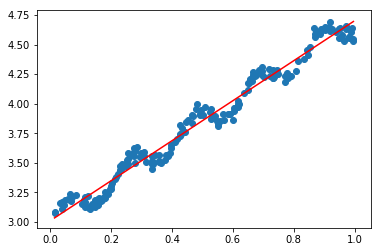

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(np.array(xArr)[:,1] ,np.array(yArr))
xCopy = xMat.copy()
xCopy.sort(0)
yHat = xCopy * ws
ax.plot(xCopy[:, 1],yHat ,'r')
plt.show()

In [12]:
np.corrcoef(yHat.T , yMat)

array([[1.        , 0.13653777],
       [0.13653777, 1.        ]])

In [13]:
yHat.shape , yMat.shape

((200, 1), (1, 200))

In [14]:
def lwlr(testPoint , xArr ,yArr ,k=1.0):
    xMat = np.mat(xArr )
    yMat = np.mat(yArr).T
    m = xMat.shape[0]
    weights = np.mat(np.eye((m)))
    for j in range(m):
        diffMat = testPoint - xMat[j,:]
        weights[ j, j] = np.exp(diffMat * diffMat.T /(-2.0 * k ** 2))
    xTx = xMat.T * (weights * xMat)
    if np.linalg.det(xTx) == 0.0:
        print('this matrix is singular , cannot da inverse')
        return 
    ws = xTx.I* (xMat.T * (weights * yMat))
    return testPoint * ws


In [15]:
def lwlrTest(testArr , xArr ,yArr,k=1.0):
    m = np.array(testArr).shape[0]
    yHat = np.zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i] , xArr ,yArr, k)
    return yHat

In [16]:
xArr , yArr = loadDataSet('ex0.txt')
yArr[0]

3.176513

单个点的描 述 lwlr， 

In [17]:
lwlr(xArr[0] , xArr, yArr , 0.01)

matrix([[3.20366661]])

In [18]:
xArr.shape , xArr.shape , yArr.shape

((200, 2), (200, 2), (200,))

In [19]:
yHat = lwlrTest(xArr , xArr , yArr ,0.01)

In [20]:
xMat = np.mat(xArr)
srtInd = xMat[:,1].argsort(0)
xSort = xMat[srtInd][:,0,:]

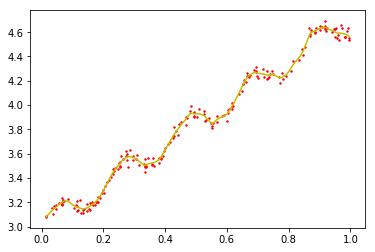

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xSort[:,1] , yHat[srtInd] ,'y')
ax.scatter(np.array(xArr)[:,1] ,np.array(yArr),c='r',s=2)
plt.show()

In [22]:
def ressError(yArr ,yHatArr):
    return ((yArr - yHatArr )** 2).sum()

In [26]:
abX , abY = loadDataSet('abalone.txt')
yHat01 = lwlrTest(abX[:99] ,abX[:99],abY[:99],0.1)
yHat1  = lwlrTest(abX[:99] ,abX[:99],abY[:99],1)
yHat10  = lwlrTest(abX[:99] ,abX[:99],abY[:99],10)

In [27]:
ressError(abY[:99] , yHat01.T),\
ressError(abY[:99] , yHat1.T),\
ressError(abY[:99] , yHat10.T)

(56.811168577945885, 429.8905618702014, 549.118170882589)

In [28]:
yHat01  = lwlrTest(abX[100:199] ,abX[0:99],abY[0:99],0.1)
ressError(abY[100:199] , yHat01.T)

60571.25199167674

In [29]:
yHat10  = lwlrTest(abX[100:199] ,abX[0:99],abY[0:99],10)
ressError(abY[100:199] , yHat10.T)

517.5711905380425

In [30]:
yHat1  = lwlrTest(abX[100:199] ,abX[0:99],abY[0:99],1)
ressError(abY[100:199] , yHat1.T)

573.5261441896967

In [42]:
ws = standRegres(abX[0:99],abY[0:99])
yHat = np.mat(abX[100:199])*ws
ressError(abY[100:199] , np.array(yHat).T)

518.6363153239507

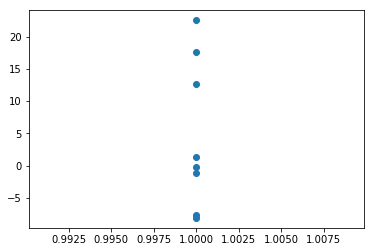

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter([1]*8 , ws)
plt.show()

In [33]:
def ridgeRegres(xMat,yMat , lam=0.2):
    xTx = xMat.T * xMat
    denom = xTx + np.eye(xMat.shape[1])*lam
    if np.linalg.det(denom) == 0.0:
        print('this matrix is singular , cannot da inverse')
        return
    ws = denom.I * (xMat.T * yMat)
    return ws

In [34]:
def ridgeTest(xArr ,yArr ):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    yMean = np.mean(yMat,0)
    yMat = yMat- yMean
    xMeans = np.mean(xMat ,0)
    xVar = np.var(xMat , 0)
    xMat = (xMat - xMeans) / xVar
    numTestPts =30
    wMat = np.zeros((numTestPts ,xMat.shape[1]))
    for i in range(numTestPts):
        ws = ridgeRegres(xMat , yMat,np.exp(i -10))
        wMat[i,:] = ws.T
    return wMat
    

In [96]:
ridgeWeights = ridgeTest(abX, abY)
abX.shape, abY.shape

((4177, 8), (4177,))

In [36]:
ridgeWeights.shape , abX.shape

((30, 8), (4177, 8))

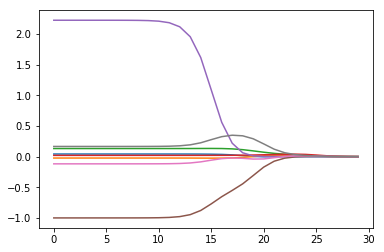

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ridgeWeights)
plt.show()

In [38]:
def regularize(xMat):#regularize by columns
    inMat = xMat.copy()
    inMeans = mean(inMat,0)   #calc mean then subtract it off
    inVar = var(inMat,0)      #calc variance of Xi then divide by it
    inMat = (inMat - inMeans)/inVar
    return inMat

In [97]:
def stageWise(xArr , yArr , eps=0.01,numIt = 100):
    xMat= np.mat(xArr)
    yMat = np.mat(yArr).T
    yMean = np.mean(yMat , 0)
    yMat = yMat - yMean
    xMat = regularize(xMat)
    m , n = xMat.shape
    returnMat = np.zeros((numIt ,n))
    ws = np.zeros((n,1))
    wsTest = ws.copy()
    wsMax = ws.copy()
    for i in range(numIt):
        print (ws.T)
        lowestError = np.inf; 
        for j in range(n):
            for sign in [-1,1]:
                wsTest = ws.copy()
                wsTest[j] += eps*sign
                yTest = xMat*wsTest
                rssE = ressError(yMat.A,yTest.A)
                if rssE < lowestError:
                    lowestError = rssE
                    wsMax = wsTest
        ws = wsMax.copy()
        returnMat[i:] = ws.T
    return returnMat
        

In [98]:
xArr , yArr = loadDataSet('abalone.txt')

In [99]:
stageWise(xArr, yArr, 0.01,200)

[[0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.   0.   0.   0.01 0.   0.   0.   0.  ]]
[[0.   0.   0.   0.02 0.   0.   0.   0.  ]]
[[0.   0.   0.   0.03 0.   0.   0.   0.  ]]
[[0.   0.   0.   0.04 0.   0.   0.   0.  ]]
[[0.   0.   0.   0.05 0.   0.   0.   0.  ]]
[[0.   0.   0.   0.06 0.   0.   0.   0.  ]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.  ]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.01]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.02]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.03]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.04]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.05]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.06]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.07]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.08]]
[[0.   0.   0.01 0.05 0.   0.   0.   0.08]]
[[0.   0.   0.01 0.05 0.   0.   0.   0.09]]
[[0.   0.   0.01 0.05 0.   0.   0.   0.1 ]]
[[0.   0.   0.01 0.05 0.   0.   0.   0.11]]
[[ 0.    0.    0.01  0.05  0.   -0.01  0.    0.11]]
[[ 0.    0.    0.01  0.05  0.   -0.02  0.    0.11]]
[[ 0.    0.    0.01  0.05  0.   

array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.05,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36],
       [ 0.04,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36],
       [ 0.05,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36]])

In [100]:
xMat = np.mat(xArr)
yMat = np.mat(yArr)
# xMat = regularize(xMat)
# yMean = np.mean(yMat,0)
# yMat = yMat - yMean
weights =  standRegres(xMat , yMat)
weights.T

matrix([[  0.08861935,   6.16314281,  13.34649509,  14.54157603,
           8.84433835, -21.24991205, -11.59911917,   6.61777829]])

In [101]:
xMat.shape,yMat.shape

((4177, 8), (1, 4177))

In [138]:
lgX = xMat[:58,:4]
lgY = yMat.T[:58,0].T
lgX.shape,lgY.shape

((58, 4), (1, 58))

In [139]:
lgX1 = np.mat(np.ones((58,5))) 
lgX1[:,1:5] = lgX

In [140]:
lgX1[0]

matrix([[1.   , 1.   , 0.455, 0.365, 0.095]])

In [155]:
ws = standRegres(lgX1 , lgY)
ws

matrix([[-0.41840538],
        [-0.10870462],
        [-0.66376502],
        [32.78914166],
        [-9.55485701]])

In [143]:
lgX1[0] *ws , lgY[0,0]

(matrix([[10.2312022]]), 15.0)

In [144]:
lgX1[-1]*ws ,lgY[0,-1]

(matrix([[10.49483428]]), 8.0)

In [145]:
lgX1[43]*ws ,lgY[0,43]

(matrix([[3.83837691]]), 5.0)

In [147]:
lgX1.shape, lgY.shape

((58, 5), (1, 58))

In [201]:
ws = ridgeTest(np.array(lgX),np.array(lgY))

In [ ]:
def crossValidation(xArr,yArr,numVal=10):
    m = len(yArr) 
    indexList = np.arange(m)
    errorMat = np.zeros((numVal,30))
    for i in range(numVal):
        trainX=[]; trainY=[]
        testX = []; testY = []
        np.random.shuffle(indexList)
        for j in range(m):
            if j < m*0.9: 
                trainX.append(xArr[indexList[j]])
                trainY.append(yArr[indexList[j]])
            else:
                testX.append(xArr[indexList[j]])
                testY.append(yArr[indexList[j]])
        wMat = ridgeTest(trainX , np.array(trainY).T)
        for k in range(30):
            matTestX = np.mat(testX); matTrainX=np.mat(trainX)
            meanTrain = np.mean(matTrainX,0)
            varTrain = var(matTrainX,0)
            matTestX = (matTestX-meanTrain)/varTrain 
            yEst = matTestX * mat(wMat[k,:]).T + np.mean(trainY)
            errorMat[i,k]=ressError(yEst.T.A,np.array(testY)) 
    meanErrors = np.mean(errorMat,0)
    minMean = float(min(meanErrors))
    bestWeights = wMat[np.nonzero(meanErrors==minMean)]
    xMat = np.mat(xArr); yMat=np.mat(yArr).T
    meanX = np.mean(xMat,0); varX = np.var(xMat,0)
    unReg = bestWeights / varX
    print ("the best model from Ridge Regression is:\n",unReg)
    print ("with constant term: ",-1*sum(multiply(meanX,unReg)) + mean(yMat))

In [ ]:
crossValidation(np.array(lgX),np.array(lgY).T,10)